# Tarea 3

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [227]:
using Plots
using PyPlot
using PlotRecipes
using LaTeXStrings
gr()
pyplot()
plotly()

INFO: Precompiling module PyPlot.
Info: Installing matplotlib via the Conda matplotlib package...
Info: Running `conda install -y matplotlib` in root environment


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Pau Martin\.julia\v0.6\Conda\deps\usr

  added / updated specs: 
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sip-4.19.8                 |   py36h6538335_0         282 KB
    freetype-2.9.1             |       ha9979f8_1         470 KB
    cycler-0.10.0              |   py36h009560c_0          13 KB
    pyqt-5.9.2                 |   py36h6538335_2         4.2 MB
    pytz-2018.5                |           py36_0         232 KB
    kiwisolver-1.0.1           |   py36h6538335_0          61 KB
    pyparsing-2.2.0            |           py36_1          96 KB
    matplotlib-2.2.3           |   py36hd159220_0         6.5 MB
    ------------------------------------------------------------
                                           Total:        11.8 MB

The following NEW packages 

sip-4.19.8           | 282 KB    | ########## | 100% 
freetype-2.9.1       | 470 KB    | ########## | 100% 
cycler-0.10.0        | 13 KB     | ########## | 100% 
pyqt-5.9.2           | 4.2 MB    | ########## | 100% 
pytz-2018.5          | 232 KB    | ########## | 100% 
kiwisolver-1.0.1     | 61 KB     | ########## | 100% 
pyparsing-2.2.0      | 96 KB     | ########## | 100% 
matplotlib-2.2.3     | 6.5 MB    | #########9 | 100% 

Preparing transaction: ...working... 

matplotlib-2.2.3     | 6.5 MB    | ########## | 100% 


done
Verifying transaction: ...working... done
Executing transaction: ...working... done


Plots.PlotlyBackend()

In [268]:
doc"""
    Fμ(f, x0, n_iter)
Devuelve el vector `iterados` que incluye como componentes a la condicion inicial `x_0` y a los iterados obtenidos a partir de `x_0` evaluado en la función `F` 
"""
function Fμ(f, x0, n_iter::Int64=1000)

    iterados= [x0]    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        x_nn = f(x_n)
        x_n = x_nn
        push!(iterados, x_nn)
    end
    
    return iterados
end

Fμ

In [269]:
F(x) = x^2 - 2

F (generic function with 1 method)

### (a) Condición inicial $x_0 = 0 $

In [270]:
Fμ(F, 0, 10000)

10001-element Array{Int64,1}:
  0
 -2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2

 Para la condición $x_0 = 0$ observamos que a partir de $F^2$, $F(x) = 2$, es decir, que desde $F^2(x)$ hasta $F^{100}(x)$, $F(x) = 2$. Dicho de otra manera, el unico itereado diferente de 2 es el primer iterado $F^1(x)$

### (b) Condición inicial $x_0 = 0.1$

In [271]:
Fμ(F, 0.1, 10000)

10001-element Array{Float64,1}:
  0.1      
 -1.99     
  1.9601   
  1.84199  
  1.39293  
 -0.0597333
 -1.99643  
  1.98574  
  1.94317  
  1.77589  
  1.15379  
 -0.668772 
 -1.55274  
  ⋮        
 -0.18187  
 -1.96692  
  1.86879  
  1.49237  
  0.227155 
 -1.9484   
  1.79626  
  1.22657  
 -0.495532 
 -1.75445  
  1.07809  
 -0.837723 

### (c) Condición inicial $x_0 = 0.001$

In [272]:
Fμ(F, 0.001, 10000)

10001-element Array{Float64,1}:
  0.001   
 -2.0     
  2.0     
  1.99998 
  1.99994 
  1.99974 
  1.99898 
  1.99591 
  1.98364 
  1.93482 
  1.74353 
  1.03991 
 -0.918594
  ⋮       
 -0.354982
 -1.87399 
  1.51183 
  0.28563 
 -1.91842 
  1.68032 
  0.823468
 -1.3219  
 -0.25258 
 -1.9362  
  1.74888 
  1.05859 

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [104]:
doc"""
    mapeoitertivo(f, x0, n_iter)
Devuelve la n-ésima iteración de la función `f` a partir de la condición inicial $x_0$.

"""
function mapeoiterativo(f, x0, n_iter::Int64=1000)
    
x_nn = x_n = x0
iteraciones = []
    
    for i in 1:n_iter
        x_nn = f(x_n)
        x_n = x_nn
    end


grafica = plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

plot!([x0, x0, x1, x1, x2], [-0.5, x1, x1, x2, x2], 
line=(:green, :path, 2.0, :dot), marker=(:dot, 0.5))
    
    
    
    
    
    
    return grafica
end

Fμ

In [135]:
G(x) = sqrt(x)

condiciones_iniciales = 0:0.1:10
iterados4 = []
for x0 in condiciones_iniciales
    iterado = Fμ(G, x0, 100)
    push!(iterados4, iterado)
end

In [136]:
iterados4

101-element Array{Any,1}:
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

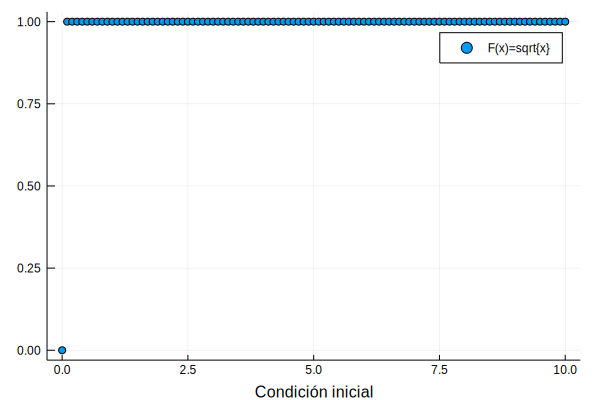

In [143]:
scatter(condiciones_iniciales, iterados4, label="F(x)=\sqrt{x}", xlabel="Condición inicial")

Para analizar lo que ocurre 

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

## 5

- Para el mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

In [154]:
"""
    random(distancia, semidistancia)
Devuelve un numero aleatorio entre el intervalo [a,b] (y sus variantes (a,b), (a,b], [a,b)). La primera componenete de l funcnion es la `distancia` entre `a` y `b`, mientras que la segunda componenete hace referencia a la `semidistancia` entre `a y `b`.
"""

function random(distancia, semidistancia)
    aleatorio = (distancia * rand()) - semidistancia
    return aleatorio
end 

random

### (a) $

In [244]:
x_aleatorio = random(4, 2)

iterados_aleatorios = Fμ(F, x_aleatorio, 20000)

20001-element Array{Float64,1}:
 -1.97867 
  1.91515 
  1.6678  
  0.781569
 -1.38915 
 -0.070262
 -1.99506 
  1.98028 
  1.9215  
  1.69216 
  0.863394
 -1.25455 
 -0.426102
  ⋮       
  0.840225
 -1.29402 
 -0.325507
 -1.89405 
  1.58741 
  0.519863
 -1.72974 
  0.992007
 -1.01592 
 -0.967904
 -1.06316 
 -0.869685

In [250]:
gr()

Plots.GRBackend()

In [253]:
h = histogram(iterados_aleatorios, nbins=length(iterados_aleatorios));
savefig(h, "histograma.png")

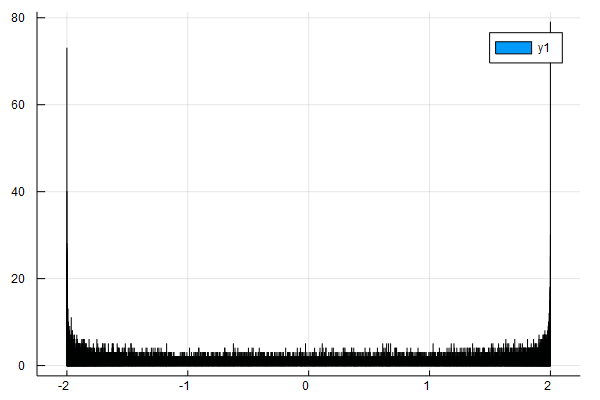

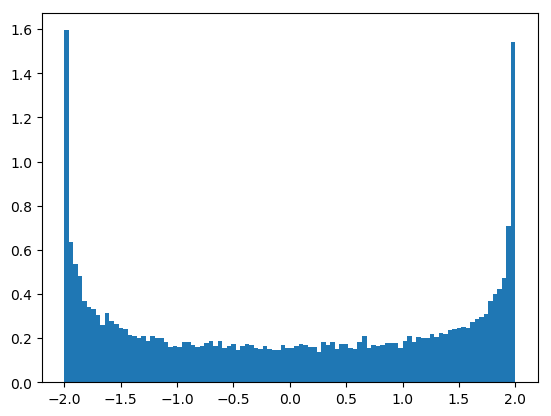

In [266]:
h_norm = PyPlot.plt[:hist](iterados_aleatorios,normed=true, bins=100);

In [247]:
it_aleatorios_norm = normalize(iterados_aleatorios)

20001-element Array{Float64,1}:
 -0.00989631 
  0.0095786  
  0.00834149 
  0.003909   
 -0.00694781 
 -0.000351414
 -0.00997828 
  0.00990432 
  0.00961034 
  0.00846329 
  0.00431825 
 -0.00627462 
 -0.00213114 
  ⋮          
  0.00420237 
 -0.00647203 
 -0.00162802 
 -0.00947304 
  0.00793939 
  0.00260009 
 -0.00865128 
  0.00496151 
 -0.00508111 
 -0.00484095 
 -0.00531739 
 -0.00434972 

In [248]:
h_2 = histogram(it_aleatorios_norm, nbins = 20)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.